# Evaluation of MSSW on AGRAW1

## Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn

## AGRAW1 dataset locations

In [2]:
abrupt_agraw1_path = '../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw1_1_abrupt_drift_0_noise_balanced.arff'
gradual_agraw1_paths = [
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_05.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_1.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_5.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_10.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_20.arff'
]

all_agraw1_data_paths = [abrupt_agraw1_path] + gradual_agraw1_paths

## Accept and preprocess AGRAW1 datasets

In [3]:
from eval_helpers import accepting
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


agraw1_exclude_reference_batches = {}
agraw1_exclude_testing_batches = {}
agraw1_onehot_reference_batches = {}
agraw1_onehot_testing_batches = {}
agraw1_target_reference_batches = {}
agraw1_target_testing_batches = {}


# agraw1 with categories excluded
for file_path in all_agraw1_data_paths:
    df_x, df_y = accepting.get_clean_df(file_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)
    
    df_x_ref_num, df_x_ref_cat = accepting.divide_numeric_categorical(df_x_ref)
    df_x_test_num, df_x_test_cat = accepting.divide_numeric_categorical(df_x_test)
    
    reference_data = df_x_ref_num.to_numpy()
    testing_data = df_x_test_num.to_numpy()
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    
    agraw1_exclude_reference_batches[file_path] = ref_batches
    agraw1_exclude_testing_batches[file_path] = test_batches
    
print('agraw1 exclude')
print(agraw1_exclude_reference_batches)
print(agraw1_exclude_testing_batches)

# agraw1 with categories onehot encoded
for file_path in all_agraw1_data_paths:
    df_x, df_y = accepting.get_clean_df(file_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)
    
    df_x_ref_num, df_x_ref_cat = accepting.divide_numeric_categorical(df_x_ref)
    df_x_test_num, df_x_test_cat = accepting.divide_numeric_categorical(df_x_test)
    
    ref_index = df_x_ref_cat.index
    test_index = df_x_test_cat.index
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(df_x_ref_cat)
    df_x_ref_cat_transformed = pd.DataFrame(encoder.transform(df_x_ref_cat))
    df_x_test_cat_transformed = pd.DataFrame(encoder.transform(df_x_test_cat))
    df_x_ref_cat_transformed.set_index(ref_index, inplace=True)
    df_x_test_cat_transformed.set_index(test_index, inplace=True)
    
    reference_data = df_x_ref_num.join(df_x_ref_cat_transformed, lsuffix='_num').to_numpy()
    testing_data = df_x_test_num.join(df_x_test_cat_transformed, lsuffix='_num').to_numpy()
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    
    agraw1_onehot_reference_batches[file_path] = ref_batches
    agraw1_onehot_testing_batches[file_path] = test_batches
    
print('agraw1 onehot')
print(agraw1_onehot_reference_batches)
print(agraw1_onehot_testing_batches)

# agraw1 with categories target encoded
for file_path in all_agraw1_data_paths:
    df_x, df_y = accepting.get_clean_df(file_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)
    
    df_x_ref_num, df_x_ref_cat = accepting.divide_numeric_categorical(df_x_ref)
    df_x_test_num, df_x_test_cat = accepting.divide_numeric_categorical(df_x_test)
    
    ref_index = df_x_ref_cat.index
    test_index = df_x_test_cat.index
    encoder = TargetEncoder()
    encoder.fit(df_x_ref_cat, df_y_ref)
    df_x_ref_cat_transformed = pd.DataFrame(encoder.transform(df_x_ref_cat))
    df_x_test_cat_transformed = pd.DataFrame(encoder.transform(df_x_test_cat))
    df_x_ref_cat_transformed.set_index(ref_index, inplace=True)
    df_x_test_cat_transformed.set_index(test_index, inplace=True)
    
    reference_data = df_x_ref_num.join(df_x_ref_cat_transformed, lsuffix='_num').to_numpy()
    testing_data = df_x_test_num.join(df_x_test_cat_transformed, lsuffix='_num').to_numpy()
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    
    agraw1_target_reference_batches[file_path] = ref_batches
    agraw1_target_testing_batches[file_path] = test_batches
    
print('agraw1 target')
print(agraw1_target_reference_batches)
print(agraw1_target_testing_batches)

df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  142923.630833      0.000000  28.0  b'level0'  b'car13'  b'zipcode3'   
99996   48591.770745  22774.455785  24.0  b'level2'   b'car7'  b'zipcode1'   
99997   40282.441180  70705.062385  24.0  b'level0'  b'car14'  b'zipcode9'   
99998   24701.771322  17773.082776  70.0  b'level2'  b'car14'  b'zipcode1'   
99999  101356.827789      0.000000  63.0  b'level3'  b'car20'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   20450.346419  50131.775485  68.0  b'level2'  b'car18'  b'zipcode7'   
99996  142923.630833      0.000000  28.0  b'level0'  b'car13'  b'zipcode3'   
99997   48591.770745  22774.455785  24.0  b'level2'   b'car7'  b'zipcode1'   
99998   40282.441180  70705.062385  24.0  b'level0'  b'car14'  b'zipcode9'   
99999   24701.771322  17773.082776  70.0  b'level2'  b'car14'  b'zipcode1'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   82084.560570      0.000000  38.0  b'level1'   b'car8'  b'zipcode1'   
99996  122185.589049      0.000000  68.0  b'level2'  b'car16'  b'zipcode5'   
99997   75112.189101      0.000000  43.0  b'level0'  b'car14'  b'zipcode3'   
99998   77645.133039      0.000000  78.0  b'level4'   b'car9'  b'zipcode6'   
99999   20450.346419  50131.775485  68.0  b'level2'  b'car18'  b'zipcode7'   

             hvalue  hyears           loan      class  
0   

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  129778.800352      0.000000  37.0  b'level2'   b'car1'  b'zipcode8'   
99996  124575.146339      0.000000  53.0  b'level0'   b'car7'  b'zipcode4'   
99997   65021.355936  43217.169171  39.0  b'level3'  b'car18'  b'zipcode4'   
99998  113209.808491      0.000000  53.0  b'level2'  b'car15'  b'zipcode2'   
99999   60121.727315  24438.661331  62.0  b'level1'  b'car14'  b'zipcode2'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   37724.568475  11570.033669  27.0  b'level1'   b'car8'  b'zipcode3'   
99996  110548.635896      0.000000  58.0  b'level4'  b'car20'  b'zipcode2'   
99997  119805.259163      0.000000  73.0  b'level1'  b'car15'  b'zipcode1'   
99998  120012.609799      0.000000  48.0  b'level1'   b'car9'  b'zipcode7'   
99999  120413.864305      0.000000  38.0  b'level4'   b'car9'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   86287.261924      0.000000  65.0  b'level2'  b'car18'  b'zipcode4'   
99996   78633.802398      0.000000  48.0  b'level2'  b'car11'  b'zipcode4'   
99997   99038.707844      0.000000  79.0  b'level1'  b'car16'  b'zipcode8'   
99998  120472.854608      0.000000  40.0  b'level3'  b'car16'  b'zipcode6'   
99999  128351.871620      0.000000  56.0  b'level2'   b'car6'  b'zipcode7'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  142923.630833      0.000000  28.0  b'level0'  b'car13'  b'zipcode3'   
99996   48591.770745  22774.455785  24.0  b'level2'   b'car7'  b'zipcode1'   
99997   40282.441180  70705.062385  24.0  b'level0'  b'car14'  b'zipcode9'   
99998   24701.771322  17773.082776  70.0  b'level2'  b'car14'  b'zipcode1'   
99999  101356.827789      0.000000  63.0  b'level3'  b'car20'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   20450.346419  50131.775485  68.0  b'level2'  b'car18'  b'zipcode7'   
99996  142923.630833      0.000000  28.0  b'level0'  b'car13'  b'zipcode3'   
99997   48591.770745  22774.455785  24.0  b'level2'   b'car7'  b'zipcode1'   
99998   40282.441180  70705.062385  24.0  b'level0'  b'car14'  b'zipcode9'   
99999   24701.771322  17773.082776  70.0  b'level2'  b'car14'  b'zipcode1'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   82084.560570      0.000000  38.0  b'level1'   b'car8'  b'zipcode1'   
99996  122185.589049      0.000000  68.0  b'level2'  b'car16'  b'zipcode5'   
99997   75112.189101      0.000000  43.0  b'level0'  b'car14'  b'zipcode3'   
99998   77645.133039      0.000000  78.0  b'level4'   b'car9'  b'zipcode6'   
99999   20450.346419  50131.775485  68.0  b'level2'  b'car18'  b'zipcode7'   

             hvalue  hyears           loan      class  
0   

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  129778.800352      0.000000  37.0  b'level2'   b'car1'  b'zipcode8'   
99996  124575.146339      0.000000  53.0  b'level0'   b'car7'  b'zipcode4'   
99997   65021.355936  43217.169171  39.0  b'level3'  b'car18'  b'zipcode4'   
99998  113209.808491      0.000000  53.0  b'level2'  b'car15'  b'zipcode2'   
99999   60121.727315  24438.661331  62.0  b'level1'  b'car14'  b'zipcode2'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   37724.568475  11570.033669  27.0  b'level1'   b'car8'  b'zipcode3'   
99996  110548.635896      0.000000  58.0  b'level4'  b'car20'  b'zipcode2'   
99997  119805.259163      0.000000  73.0  b'level1'  b'car15'  b'zipcode1'   
99998  120012.609799      0.000000  48.0  b'level1'   b'car9'  b'zipcode7'   
99999  120413.864305      0.000000  38.0  b'level4'   b'car9'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   86287.261924      0.000000  65.0  b'level2'  b'car18'  b'zipcode4'   
99996   78633.802398      0.000000  48.0  b'level2'  b'car11'  b'zipcode4'   
99997   99038.707844      0.000000  79.0  b'level1'  b'car16'  b'zipcode8'   
99998  120472.854608      0.000000  40.0  b'level3'  b'car16'  b'zipcode6'   
99999  128351.871620      0.000000  56.0  b'level2'   b'car6'  b'zipcode7'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


agraw1 onehot
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw1_1_abrupt_drift_0_noise_balanced.arff': [array([[1.15014165e+05, 0.00000000e+00, 5.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.98557062e+04, 2.03725735e+04, 7.30000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.77012909e+04, 0.00000000e+00, 5.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.23384354e+05, 0.00000000e+00, 6.20000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00628871e+05, 0.00000000e+00, 5.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13794197e+05, 0.00000000e+00, 7.00000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([[4.58415980e+04, 7.22977987e+04, 5.30000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.32354614e+05, 0.00000000e+00, 2.3

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   20450.346419  50131.775485  68.0  b'level2'  b'car18'  b'zipcode7'   
99996  142923.630833      0.000000  28.0  b'level0'  b'car13'  b'zipcode3'   
99997   48591.770745  22774.455785  24.0  b'level2'   b'car7'  b'zipcode1'   
99998   40282.441180  70705.062385  24.0  b'level0'  b'car14'  b'zipcode9'   
99999   24701.771322  17773.082776  70.0  b'level2'  b'car14'  b'zipcode1'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   82084.560570      0.000000  38.0  b'level1'   b'car8'  b'zipcode1'   
99996  122185.589049      0.000000  68.0  b'level2'  b'car16'  b'zipcode5'   
99997   75112.189101      0.000000  43.0  b'level0'  b'car14'  b'zipcode3'   
99998   77645.133039      0.000000  78.0  b'level4'   b'car9'  b'zipcode6'   
99999   20450.346419  50131.775485  68.0  b'level2'  b'car18'  b'zipcode7'   

             hvalue  hyears           loan      class  
0   

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  129778.800352      0.000000  37.0  b'level2'   b'car1'  b'zipcode8'   
99996  124575.146339      0.000000  53.0  b'level0'   b'car7'  b'zipcode4'   
99997   65021.355936  43217.169171  39.0  b'level3'  b'car18'  b'zipcode4'   
99998  113209.808491      0.000000  53.0  b'level2'  b'car15'  b'zipcode2'   
99999   60121.727315  24438.661331  62.0  b'level1'  b'car14'  b'zipcode2'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   37724.568475  11570.033669  27.0  b'level1'   b'car8'  b'zipcode3'   
99996  110548.635896      0.000000  58.0  b'level4'  b'car20'  b'zipcode2'   
99997  119805.259163      0.000000  73.0  b'level1'  b'car15'  b'zipcode1'   
99998  120012.609799      0.000000  48.0  b'level1'   b'car9'  b'zipcode7'   
99999  120413.864305      0.000000  38.0  b'level4'   b'car9'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0      115014.164791      0.000000  56.0  b'level3'  b'car15'  b'zipcode5'   
1       39855.706174  20372.573526  73.0  b'level2'   b'car3'  b'zipcode7'   
2       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
3       57795.185560  13344.143894  80.0  b'level2'   b'car1'  b'zipcode3'   
4       46602.621787  26569.114334  46.0  b'level0'  b'car13'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   86287.261924      0.000000  65.0  b'level2'  b'car18'  b'zipcode4'   
99996   78633.802398      0.000000  48.0  b'level2'  b'car11'  b'zipcode4'   
99997   99038.707844      0.000000  79.0  b'level1'  b'car16'  b'zipcode8'   
99998  120472.854608      0.000000  40.0  b'level3'  b'car16'  b'zipcode6'   
99999  128351.871620      0.000000  56.0  b'level2'   b'car6'  b'zipcode7'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

agraw1 target
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw1_1_abrupt_drift_0_noise_balanced.arff': [array([[1.15014165e+05, 0.00000000e+00, 5.60000000e+01, ...,
        4.98438784e-01, 5.19359146e-01, 5.03714710e-01],
       [3.98557062e+04, 2.03725735e+04, 7.30000000e+01, ...,
        4.96711608e-01, 4.96388707e-01, 4.96196606e-01],
       [8.77012909e+04, 0.00000000e+00, 5.20000000e+01, ...,
        4.94607347e-01, 4.78290366e-01, 5.03714710e-01],
       ...,
       [1.23384354e+05, 0.00000000e+00, 6.20000000e+01, ...,
        4.94607347e-01, 5.26588846e-01, 4.96196606e-01],
       [1.00628871e+05, 0.00000000e+00, 5.40000000e+01, ...,
        4.98438784e-01, 4.89144317e-01, 4.93636364e-01],
       [1.13794197e+05, 0.00000000e+00, 7.00000000e+01, ...,
        5.01750292e-01, 5.14954486e-01, 5.03714710e-01]]), array([[4.58415980e+04, 7.22977987e+04, 5.30000000e+01, ...,
        4.96711608e-01, 5.19359146e-01, 4.96196606e-01],
       [1.32354614e+05, 0.00000000e+00, 2.3

## AGRAW1 with categories excluded

### Find the best tol and max_iter (the drift type is irrelevant)

In [5]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers


weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(
    agraw1_exclude_reference_batches[abrupt_agraw1_path], agraw1_exclude_testing_batches[abrupt_agraw1_path])

filename = 'agraw1_exclude_new_output.txt'
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                             n_clusters=2, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

something
random state: 1053
total number of results: 100
maximum number of iterations: 10
minimum initial inertia: 579.5035960990477
maximum initial inertia: 1322.8012622192632
number of unique final inertia values: 5
minimum final inertia: 421.31949749170815
maximum final inertia: 421.31954049841676
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

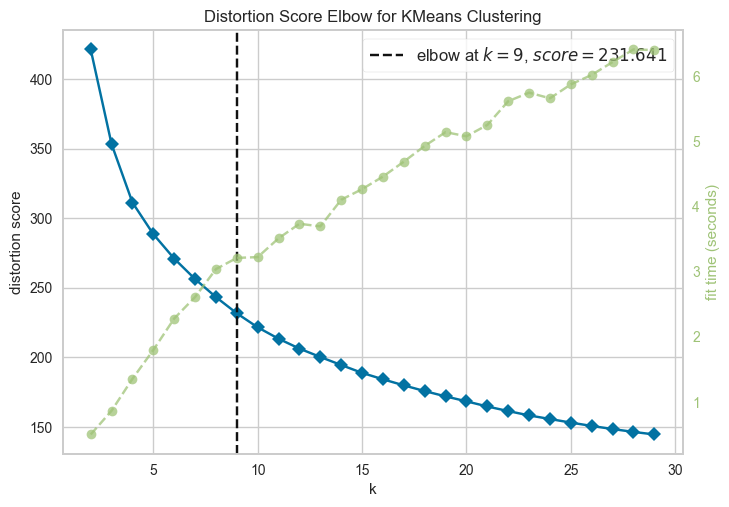

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [6]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))

### Use them for the analysis

In [7]:
from core import mssw_eval
import importlib
importlib.reload(mssw_eval)


agraw1_exclude_stats = {}
for agraw1_path in all_agraw1_data_paths:
    runs_results_bool, final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        mssw_eval.all_drifting_batches_randomness_robust(
        agraw1_exclude_reference_batches[agraw1_path],
        agraw1_exclude_testing_batches[agraw1_path],
        n_clusters=9,
        n_init=100,
        max_iter=10000,
        tol=0,
        true_drift_idx=2,
        min_runs=2
    )
    agraw1_exclude_stats[agraw1_path] = {
        'runs_results_bool': runs_results_bool,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('AGRAW1 STATS')
print(agraw1_exclude_stats)

min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
AGRAW1 STATS
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw1_1_abrupt_drift_0_noise_balanced.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.25, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_05.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.25, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_1.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean

### Save the results

In [8]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in agraw1_exclude_stats.items():
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'exclude'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(100)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('agraw1_exclude_jupyter.csv', index=False)

## AGRAW1 with categories onehot encoded

### Find the best tol and max_iter (the drift type is irrelevant)

In [9]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers


weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(
    agraw1_onehot_reference_batches[abrupt_agraw1_path], agraw1_onehot_testing_batches[abrupt_agraw1_path])

filename = 'agraw1_onehot_new_output.txt'
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                             n_clusters=2, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

random state: 1053
total number of results: 100
maximum number of iterations: 11
minimum initial inertia: 1237.8897849804596
maximum initial inertia: 1307.4991122639638
number of unique final inertia values: 51
minimum final inertia: 661.7971354704756
maximum final inertia: 673.9611674438379
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

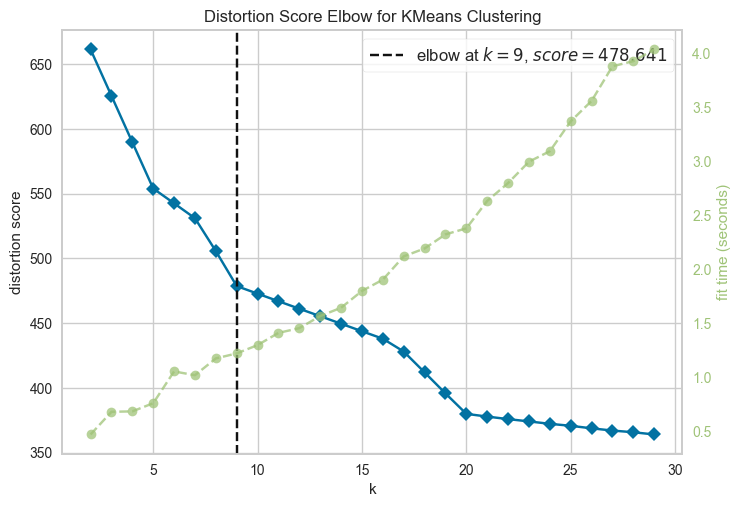

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [10]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))

### Use them for the analysis

In [11]:
from core import mssw_eval


agraw1_onehot_stats = {}
for agraw1_path in all_agraw1_data_paths:
    runs_results_bool, final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        mssw_eval.all_drifting_batches_randomness_robust(
        agraw1_onehot_reference_batches[agraw1_path],
        agraw1_onehot_testing_batches[agraw1_path],
        n_clusters=9,
        n_init=100,
        max_iter=110,
        tol=0,
        true_drift_idx=2,
        min_runs=2
    )
    agraw1_onehot_stats[agraw1_path] = {
        'runs_results_bool': runs_results_bool,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('AGRAW1 STATS')
print(agraw1_onehot_stats)

min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
AGRAW1 STATS
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw1_1_abrupt_drift_0_noise_balanced.arff': {'runs_results_bool': [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 1.0, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_05.arff': {'runs_results_bool': [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 1.0, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_1.arff': {'runs_results_bool': [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.

### Save the results

In [12]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in agraw1_onehot_stats.items():
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'onehot'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(110)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('agraw1_onehot_jupyter.csv', index=False)

## AGRAW1 with categories target encoded

### Find the best tol and max_iter (the drift type is irrelevant)

In [13]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers


weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(
    agraw1_target_reference_batches[abrupt_agraw1_path], agraw1_target_testing_batches[abrupt_agraw1_path])

filename = 'agraw1_target_new_output.txt'
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                             n_clusters=2, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

random state: 1053
total number of results: 100
maximum number of iterations: 35
minimum initial inertia: 911.7567503703241
maximum initial inertia: 1753.5042586874522
number of unique final inertia values: 5
minimum final inertia: 668.7450704516307
maximum final inertia: 845.5206243764533
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

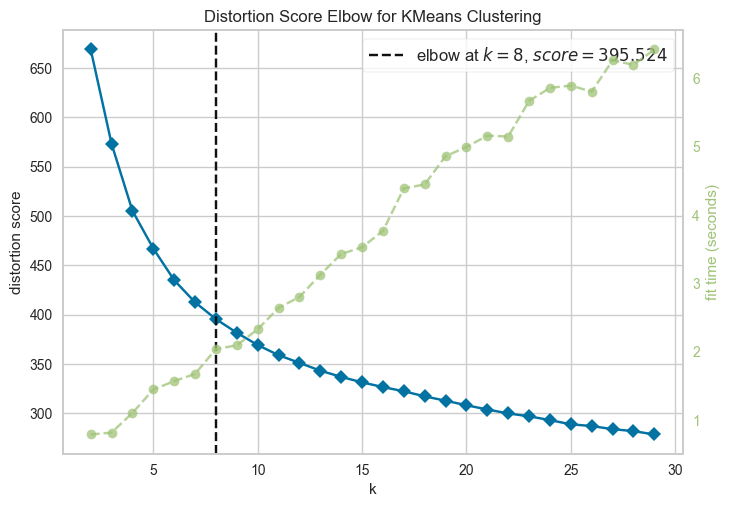

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [14]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))

### Use them for the analysis

In [15]:
from core import mssw_eval


agraw1_target_stats = {}
for agraw1_path in all_agraw1_data_paths:
    runs_results_bool, final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        mssw_eval.all_drifting_batches_randomness_robust(
        agraw1_target_reference_batches[agraw1_path],
        agraw1_target_testing_batches[agraw1_path],
        n_clusters=8,
        n_init=100,
        max_iter=350,
        tol=0,
        true_drift_idx=2,
        min_runs=2
    )
    agraw1_target_stats[agraw1_path] = {
        'runs_results_bool': runs_results_bool,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('AGRAW1 STATS')
print(agraw1_target_stats)

min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
AGRAW1 STATS
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw1_1_abrupt_drift_0_noise_balanced.arff': {'runs_results_bool': [[False, False, True, True, True, True, True], [False, False, True, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.0, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradual_drift_0_noise_balanced_05.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, True, True, True, True, True], [False, False, False, True, True, True, True], [False, False, False, True, True, True, True], [False, False, True, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.16666666666666666, 'latency_std_err': 0.048112522432468816}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw1_1_gradu

### Save the results

In [16]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in agraw1_target_stats.items():
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'target'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(350)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('agraw1_target_jupyter.csv', index=False)